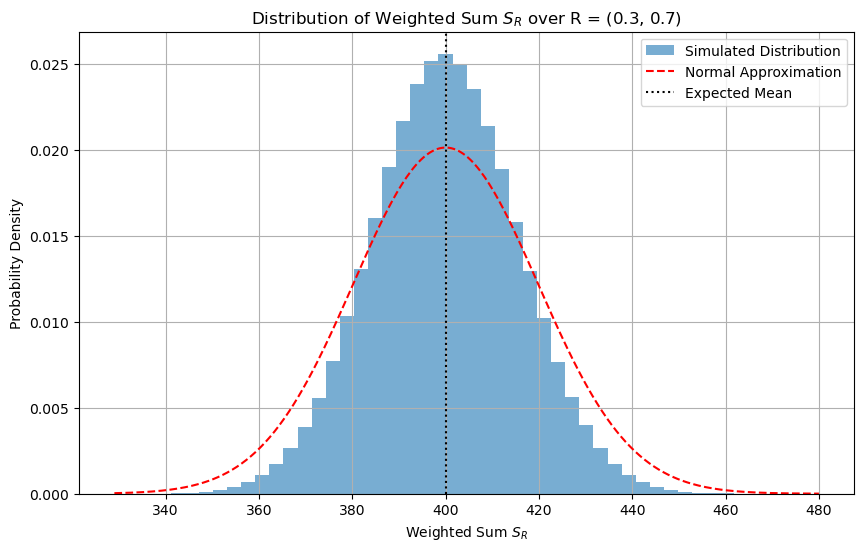

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters
N = 1000          # Number of uniform samples
G = 50            # Number of grid cells
R = (0.3, 0.7)    # Range [a, b]

# Generate random points
points = np.random.uniform(0, 1, N)

# Grid setup
edges = np.linspace(0, 1, G + 1)
cell_width = 1 / G
centers = (edges[:-1] + edges[1:]) / 2

# Count points in each grid cell
counts, _ = np.histogram(points, bins=edges)

# Compute overlap fraction w_i for each grid cell
w = np.zeros(G)
for i in range(G):
    cell_start = edges[i]
    cell_end = edges[i + 1]
    overlap_start = max(cell_start, R[0])
    overlap_end = min(cell_end, R[1])
    overlap = max(0, overlap_end - overlap_start)
    w[i] = overlap / cell_width  # Fractional overlap

# Compute weighted sum
S_R = np.sum(w * counts)

# Repeat simulation to get distribution
num_trials = 1000000
S_R_vals = np.zeros(num_trials)

for trial in range(num_trials):
    points = np.random.uniform(0, 1, N)
    counts, _ = np.histogram(points, bins=edges)
    S_R_vals[trial] = np.sum(w * counts)

# Theoretical mean and variance
expected_mean = N * (R[1] - R[0])
expected_var = (N * (1 - 1/G) / G) * np.sum(w**2)

# Plot histogram of simulation and normal approximation
x = np.linspace(min(S_R_vals), max(S_R_vals), 300)
pdf = norm.pdf(x, loc=expected_mean, scale=np.sqrt(expected_var))

plt.figure(figsize=(10, 6))
plt.hist(S_R_vals, bins=50, density=True, alpha=0.6, label='Simulated Distribution')
plt.plot(x, pdf, 'r--', label='Normal Approximation')
plt.axvline(expected_mean, color='k', linestyle=':', label='Expected Mean')
plt.title(f"Distribution of Weighted Sum $S_R$ over R = {R}")
plt.xlabel("Weighted Sum $S_R$")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(True)
plt.show()

Total Prob = 0.9999999999999989
Function execution time: 0.1579 seconds


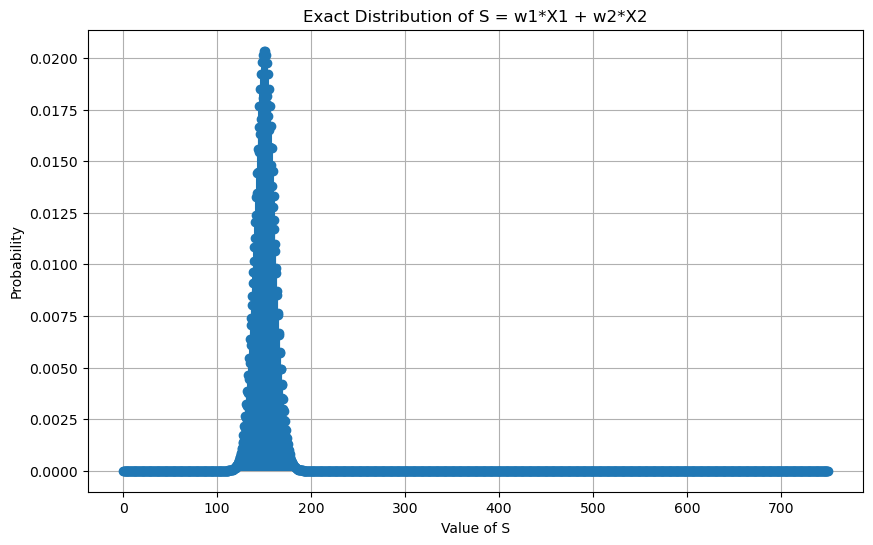

In [15]:
# Import necessary modules
import numpy as np
from scipy.stats import binom
from collections import defaultdict
import matplotlib.pyplot as plt
import time

def binomial_conv(n1, p1, w1, n2, p2, w2):
    """Calculate the binomial probability mass function."""
    
    # Parameters
    # n1, p1, w1 = 10, 0.5, 0.2
    # n2, p2, w2 = 15, 0.4, 0.1

    # Possible values for Y1 = w1 * X1
    y1_vals = [w1 * k for k in range(n1 + 1)]
    pmf_y1 = {w1 * k: binom.pmf(k, n1, p1) for k in range(n1 + 1)}

    # Possible values for Y2 = w2 * X2
    y2_vals = [w2 * l for l in range(n2 + 1)]
    pmf_y2 = {w2 * l: binom.pmf(l, n2, p2) for l in range(n2 + 1)}

    # Convolution: S = Y1 + Y2
    pmf_s = defaultdict(float) # Initialize the dictionary without needing to preallocate for each key

    # Loop over all valid combinations
    for y1, p_y1 in pmf_y1.items():
        for y2, p_y2 in pmf_y2.items():
            s = round(y1 + y2, 12)  # round to avoid floating point issues
            pmf_s[s] += p_y1 * p_y2

    # Sort and normalize (sanity check)
    s_vals = sorted(pmf_s.keys())
    probs = [pmf_s[s] for s in s_vals]
    total_prob = sum(probs)
    
    return s_vals, probs, total_prob

N = 500
n1, p1, w1 = N, 0.3, 1
n2, p2, w2 = N, 0.003, 0.5

start_time = time.perf_counter()
s_vals, probs, total_prob = binomial_conv(n1, p1, w1, n2, p2, w2)
end_time = time.perf_counter()
execution_time = end_time - start_time

print(f'Total Prob = {total_prob}')
print(f"Function execution time: {execution_time:.4f} seconds")

# Plot
plt.figure(figsize=(10, 6))
plt.stem(s_vals, probs, basefmt=" ")
plt.title("Exact Distribution of S = w1*X1 + w2*X2")
plt.xlabel("Value of S")
plt.ylabel("Probability")
plt.grid(True)
plt.show()